# EDA for UFC Data

#### EDA Steps
1. Question (complete in project proposal)
2. Read in data (complete)
3. Check packaging (complete)
4. Look at the Bottom and Top of your data (looked at head and tail)
5. Check your "n"s (complete_
6. Validate with at least one external data source (complete)
7. Make a plot (complete)
8. Try the easy solution first (complete)
9. Follow up


In [1]:
# Load the necessary packages
library(tidyverse)
library(lubridate)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




### 1. Question

Predictive main question:

For fights that do not end in submission or TKO, what are the strongest predictors of who will win?

This is a predictive question.

Some natural questions that stem from the main research question are:

Do judges award higher scores for striking (e.g. punching and kicking) over grappling (e.g. wrestling and submission attempts)?
Do judges consistnely value the same criteria?
Do judges consider other factors such as the fighters win streak or size?

Read the [README](https://github.com/UBC-MDS/DSCI522_group315) of the Project repo for a further explanation.

### 2. Read in Data

In [2]:
# 2. Read in data into jupyter
read_data <- read.csv("https://github.com/SamEdwardes/ufc-data/raw/master/data.csv")

### 3. Check Packaging

In [3]:
# 3. Check initial rows and columns ("n's"). These match what is in the csv file. 
print(nrow(read_data))
print(ncol(read_data))

[1] 5144
[1] 145


**Insights:**
- This matches what I expect from the csv as the number of rows and columns match when I check the csv document. 

### 4 Look at the Bottom and Top of your data

In [4]:
# 4. Inspect head of data to see if it reading in properly. 
head(read_data)

R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO.TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0,...,2,0,0,8,Orthodox,162.56,162.56,135,31,32
Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0,...,0,2,0,5,Southpaw,165.10,167.64,125,32,31
Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0,...,3,6,1,14,Orthodox,180.34,193.04,155,36,35
Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0,...,1,0,0,6,Orthodox,162.56,172.72,135,26,29
Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0,...,2,0,0,3,Southpaw,187.96,190.50,264,32,26
Tatiana Suarez,Nina Ansaroff,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0,...,1,2,0,4,,165.10,167.64,115,33,28


In [5]:
# 4. Inspect tail of data to make sure everything is correct.
tail(read_data)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO.TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5139,Royce Gracie,Ken Shamrock,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,1,0,1,Southpaw,185.42,NA,175,29,26
5140,Gerard Gordeau,Kevin Rosier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,1,0,0,1,Orthodox,195.58,NA,216,NA,34
5141,Ken Shamrock,Patrick Smith,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,0,0,0,Orthodox,185.42,182.88,205,30,29
5142,Royce Gracie,Art Jimmerson,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,0,0,0,Southpaw,185.42,NA,175,30,26
5143,Kevin Rosier,Zane Frazier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,0,0,0,Orthodox,193.04,NA,275,NA,NA
5144,Gerard Gordeau,Teila Tuli,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,0,0,0,Orthodox,195.58,NA,216,24,34


**Insights**

 - Data structure looks good. The first and last column look the same as the csv meaning there is no missing data and the columns are correctly labeled. There is no hidden metadata in the csv either. 

### 5. Check your "n"s

In [6]:
# 5. Find summary statistics to see the different column descriptions & find number of NAs
tidy(summary(read_data))

ERROR: Error in tidy(summary(read_data)): could not find function "tidy"


**Observations:**
> Note the data above looks good in the ranges, however, there are a lot of NAs. There are also some columns that should be removed like R_draw and B_draw which never have a value other than 0. Most of the data seems like it has appropriate highs and lows for each column. 

>I also noticed there seem to be a lot of columns on the same statistic:
- B_avg_BODY_att
- R_avg_BODY_att
- B_avg_opp_BODY_att 
- R_avg_opp_BODY_att 

> I did a bit further digging to understand what makes them different. 

> Definitions for reference:
- _opp_ containing columns is the average of damage done by the opponent on the fighter [Source: Original Kaggle Source](https://www.kaggle.com/rajeevw/ufcdata). Therefore, it is not usually the case the R_avg_BODY_att would be reflected in B_avg_opp_BODY_att if it didn't do any damage. 

> Other definitions:
- att: attempt
- landed: attempt connected with the opponent
- kd: knockdown



In [53]:
# There are a lot of NA, so I removed NAs
na_data <- read_data %>% 
    drop_na() 

In [54]:
# 5. Check n's again
nrow(na_data)
ncol(na_data)

[1] 3355

[1] 145

**Observations:**
- The number of rows although reduced by about 2000, will be large enough to conduct an analysis. The number of columns didn't change. 

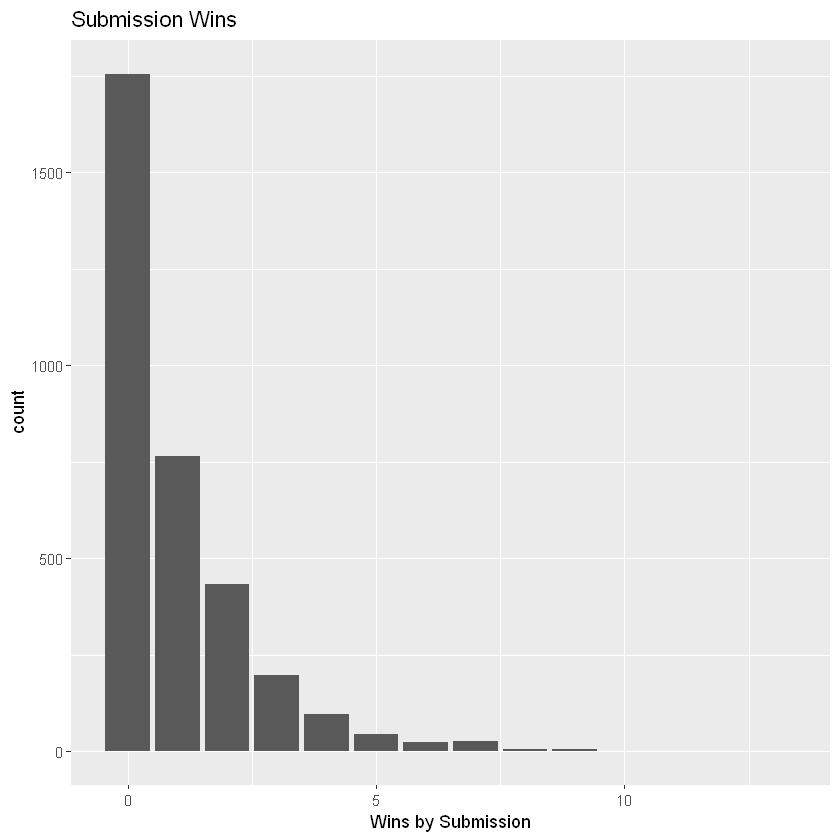

In [55]:
# 5/7. Inital graph to find out if we can use the wins column.
na_data %>%
    ggplot(aes(na_data$R_win_by_Submission)) +
    geom_bar() +
    labs(title="Submission Wins", x = "Wins by Submission")

**Observations:**

- This is not what I expected at all. I was expecting a binary response 1 for yes and 0 for no. These statistics show that the win columns for submission, decision, KO, etc.. are all for lifetime stats. 

- For our analysis we need to have the stat for how a fight ends/ how the winner wins the match to answer our research question. I can do this with another dataset that was published in the same repository as our original dataset. 

In [56]:
# We need the 'win by' column from the read_fight data because our current win data doesn't have this column to answer our research question
# as we need to filter by the fights that went to judges' decision.

# import the new data file from the same source as our original
read_fight <- read.csv("https://raw.githubusercontent.com/SamEdwardes/ufc-data/master/raw_total_fight_data.csv", 
                       header = TRUE, sep = ";") %>% 
        mutate(date = mdy(date)) %>%
        select("R_fighter", "B_fighter", "win_by", "date")

# reformat the date on the initial data to be able to left join on date and fighter

na_data <- na_data %>%
        mutate(date = ymd(date))
# merge together the old and new dataframes
merge_data <- left_join(na_data, read_fight, by = c("R_fighter", "B_fighter", "date"))

tail(na_data)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO.TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
,<fct>,<fct>,<fct>,<date>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3350,Tito Ortiz,Elvis Sinosic,John McCarthy,2001-06-29,"East Rutherford, New Jersey, USA",Red,True,Light Heavyweight,5,0,...,3,1,1,6,Orthodox,190.50,187.96,205,30,26
3351,Tito Ortiz,Evan Tanner,John McCarthy,2001-02-23,"Atlantic City, New Jersey, USA",Red,True,Light Heavyweight,5,0,...,2,1,1,5,Orthodox,190.50,187.96,205,30,26
3352,Chuck Liddell,Jeff Monson,Mario Yamasaki,2000-12-16,"Tokyo, Japan",Red,False,Middleweight,3,0,...,0,0,1,2,Orthodox,187.96,193.04,205,29,30
3353,Tito Ortiz,Wanderlei Silva,John McCarthy,2000-04-14,"Tokyo, Japan",Red,True,Light Heavyweight,5,0,...,2,0,1,3,Orthodox,190.50,187.96,205,23,25
3354,Jeremy Horn,Chuck Liddell,John McCarthy,1999-03-05,"Bay St. Louis, Mississippi, USA",Red,False,Middleweight,2,0,...,0,0,0,0,Orthodox,185.42,187.96,185,29,23
3355,Randy Couture,Vitor Belfort,John McCarthy,1997-10-17,"Bay St. Louis, Mississippi, USA",Red,False,Heavyweight,2,0,...,1,1,0,2,Orthodox,185.42,190.50,205,20,34


In [57]:
tail(merge_data)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,win_by
,<fct>,<fct>,<fct>,<date>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3350,Tito Ortiz,Elvis Sinosic,John McCarthy,2001-06-29,"East Rutherford, New Jersey, USA",Red,True,Light Heavyweight,5,0,...,1,1,6,Orthodox,190.50,187.96,205,30,26,KO/TKO
3351,Tito Ortiz,Evan Tanner,John McCarthy,2001-02-23,"Atlantic City, New Jersey, USA",Red,True,Light Heavyweight,5,0,...,1,1,5,Orthodox,190.50,187.96,205,30,26,KO/TKO
3352,Chuck Liddell,Jeff Monson,Mario Yamasaki,2000-12-16,"Tokyo, Japan",Red,False,Middleweight,3,0,...,0,1,2,Orthodox,187.96,193.04,205,29,30,Decision - Unanimous
3353,Tito Ortiz,Wanderlei Silva,John McCarthy,2000-04-14,"Tokyo, Japan",Red,True,Light Heavyweight,5,0,...,0,1,3,Orthodox,190.50,187.96,205,23,25,Decision - Unanimous
3354,Jeremy Horn,Chuck Liddell,John McCarthy,1999-03-05,"Bay St. Louis, Mississippi, USA",Red,False,Middleweight,2,0,...,0,0,0,Orthodox,185.42,187.96,185,29,23,Submission
3355,Randy Couture,Vitor Belfort,John McCarthy,1997-10-17,"Bay St. Louis, Mississippi, USA",Red,False,Heavyweight,2,0,...,1,0,2,Orthodox,185.42,190.50,205,20,34,KO/TKO


In [58]:
# Find the different values we need to answer the question we have. Since we are only looking at judge's choice, we can only keep decsions. 
unique(merge_data$win_by)

[1] KO/TKO                  TKO - Doctor's Stoppage Decision - Unanimous   
[4] Submission              Decision - Split        Overturned             
[7] Decision - Majority     DQ                      Could Not Continue     
10 Levels: Could Not Continue Decision - Majority ... TKO - Doctor's Stoppage

In [59]:
nrow(merge_data)

[1] 3355

**Observations:**

- The win by column was able to join to our data with the correct win by column. The values were what I expected for the column win by. There is no null values which means everything mapped. 

- The nrows match our initial number of rows of 2,693 on the data after we dropped NAs

### Extra Wrangling

In [60]:
# removed the columns that are not important to our question and columns that have no values
data <- merge_data %>% 
    select(-c("date", "Referee", "title_bout", "weight_class", "no_of_rounds", 
              "location", "B_win_by_TKO_Doctor_Stoppage", "B_win_by_Submission", "B_win_by_KO.TKO", 
              "R_win_by_TKO_Doctor_Stoppage", "R_win_by_Submission", "R_win_by_KO.TKO", 
              "R_win_by_Submission", "R_win_by_KO.TKO", 
              "R_win_by_TKO_Doctor_Stoppage", "R_win_by_Submission", "R_win_by_KO.TKO", "B_draw", "R_draw", 
              "B_current_lose_streak", "B_current_win_streak", "R_current_lose_streak", "R_current_win_streak",
             "B_longest_win_streak", "B_losses", "B_total_rounds_fought", "B_total_time_fought.seconds.", "B_total_title_bouts",
             "B_win_by_Decision_Majority", "B_win_by_Decision_Unanimous", "B_win_by_Decision_Split", "B_wins", "B_Stance",
             "R_longest_win_streak", "R_losses", "B_total_rounds_fought", "R_total_time_fought.seconds.", "R_total_title_bouts",
             "R_win_by_Decision_Majority", "R_win_by_Decision_Unanimous", "R_win_by_Decision_Split", "R_wins", "R_Stance", 
              "R_total_rounds_fought"))

summary(data)

           R_fighter               B_fighter     Winner     B_avg_BODY_att  
 Jim Miller     :  20   Jeremy Stephens :  17   Blue:1202   Min.   : 0.000  
 Michael Bisping:  20   Charles Oliveira:  16   Draw:  53   1st Qu.: 4.000  
 Anderson Silva :  19   Nik Lentz       :  13   Red :2100   Median : 7.600  
 Demian Maia    :  19   Evan Dunham     :  12               Mean   : 9.248  
 Donald Cerrone :  19   Rafael Dos Anjos:  12               3rd Qu.:12.667  
 Diego Sanchez  :  17   Dan Henderson   :  11               Max.   :49.000  
 (Other)        :3241   (Other)         :3274                               
 B_avg_BODY_landed B_avg_CLINCH_att B_avg_CLINCH_landed B_avg_DISTANCE_att
 Min.   : 0.000    Min.   : 0.000   Min.   : 0.000      Min.   :  0.00    
 1st Qu.: 2.875    1st Qu.: 3.500   1st Qu.: 2.000      1st Qu.: 26.33    
 Median : 5.200    Median : 6.750   Median : 4.500      Median : 48.33    
 Mean   : 6.459    Mean   : 8.574   Mean   : 5.819      Mean   : 56.75    
 3rd Qu.:

In [61]:
# filter the data by matches that ended in a decision
data <- data %>%
    filter(win_by == "Decision - Split" | win_by ==  "Decision - Unanimous" | win_by ==  "Decision - Majority")

In [62]:
# make sure we are getting an adequate data sample.
nrow(data)
ncol(data)

[1] 1607

[1] 108

### Split Data into Train and Test

In [66]:
## set the seed and split data into train and test sets
set.seed(1)
split_data <- sample(seq_len(nrow(data)), size = 0.8 * nrow(data))

train <- data[split_data, ]
test <- data[-split_data, ]

nrow(train)
ncol(train)

[1] 1285

[1] 108

In [67]:
# 5. Compare when a fighter is in the R_fighter and B_fighter columns to see are unique values for each appearence. For example, if a 
# fighter shows up in the red column for a fight they will not show up in the blue column for the same fight. 

train %>%
    filter(R_fighter == "Zak Cummings") %>%
    select(R_fighter, B_fighter, R_avg_BODY_att, B_avg_BODY_att, R_avg_opp_BODY_att, B_avg_opp_BODY_att)

R_fighter,B_fighter,R_avg_BODY_att,B_avg_BODY_att,R_avg_opp_BODY_att,B_avg_opp_BODY_att
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Zak Cummings,Michel Prazeres,7.125,9.5,6.375,10.9


In [68]:
train %>%
    filter(B_fighter == "Zak Cummings") %>%
    select(R_fighter, B_fighter, R_avg_BODY_att, B_avg_BODY_att, R_avg_opp_BODY_att, B_avg_opp_BODY_att)

R_fighter,B_fighter,R_avg_BODY_att,B_avg_BODY_att,R_avg_opp_BODY_att,B_avg_opp_BODY_att
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Yan Cabral,Zak Cummings,0.0,0.000000,1.00000,6.000000
Santiago Ponzinibbio,Zak Cummings,10.0,7.200000,11.16667,7.000000
Trevor Smith,Zak Cummings,13.8,8.666667,13.70000,6.444444
Nicolas Dalby,Zak Cummings,19.0,4.250000,17.50000,2.750000


**Observations**

- Each fight is unique which means each row has unique data. 
- The values for the same stat across R_avg, B_avg, R_avg_opp, B_avg_opp are all reporting unique values. This shows that these columns do not duplicate. 

### 6. Validate with at least one external data source

In [69]:
# 6. Validate with at least one external data source

train %>%
    filter(R_fighter == "Aaron Phillips") %>%
    select(c(R_Height_cms, R_Reach_cms, R_Weight_lbs, win_by, Winner))

R_Height_cms,R_Reach_cms,R_Weight_lbs,win_by,Winner
<dbl>,<dbl>,<dbl>,<fct>,<fct>
175.26,177.8,135,Decision - Unanimous,Blue


**Observations:**
- Verified the Aaron Philips and Matt Hobar match happened ended in an Unanimous Decsion with Hobar winning [Source: Tapout]((https://www.tapology.com/fightcenter/bouts/146806-ufc-fight-night-49-matt-the-crowbar-hobar-vs-aaron-the-model-phillips). The characteristics for Aaron matched his profile including his weight and reach. 

### 7/8. Make a plot/ try the easy solution

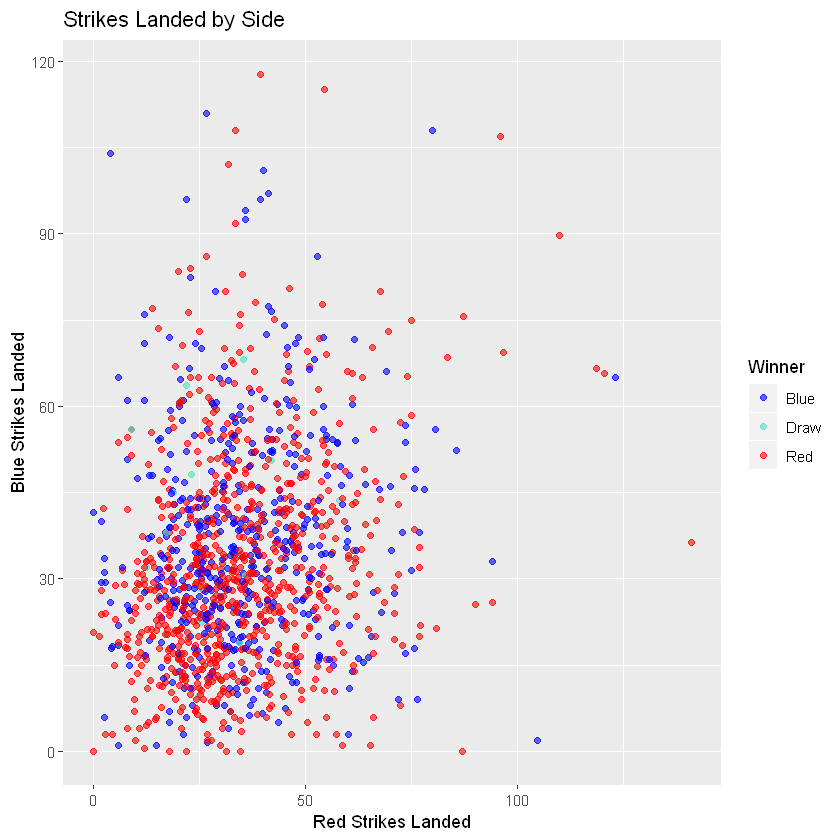

In [45]:
# 7/8 Make a plot/ easy solution

strike_scatterplot <- train %>% ggplot(aes(R_avg_SIG_STR_landed, B_avg_SIG_STR_landed, color=Winner)) +
    geom_point(alpha=0.6) + 
    labs(title="Strikes Landed by Side", x = "Red Strikes Landed", y = "Blue Strikes Landed") +
    scale_color_manual(values = c("blue", "#56ddc5", "red"))

strike_scatterplot

**Observations**

- One of the first thoughts was that strikes would decide the outcome. I plotted the number of strikes landed from Red versus Blue 
and plotted with the colour of the winner. Surprisingly, there doesn't seem to be a correlation with the number and strikes and 
winner. This also validates that the spread of values is reasonable for the columns. 

### 8. Easy Solution/ 7. Make a Plot
**The all the stats together at an equal value will predict a winner**

In [46]:
# Extract the stats for each match and the winner
numer_values <- data.frame(scale(train[4:107]), train[108], train[3])

B_value <- numer_values %>%
    select(., starts_with("B")) %>%
    select(., -contains("opp"))

summary(B_value)

 B_avg_BODY_att    B_avg_BODY_landed B_avg_CLINCH_att  B_avg_CLINCH_landed
 Min.   :-1.2931   Min.   :-1.2565   Min.   :-1.1590   Min.   :-1.0772    
 1st Qu.:-0.7333   1st Qu.:-0.7025   1st Qu.:-0.6857   1st Qu.:-0.6967    
 Median :-0.2481   Median :-0.2592   Median :-0.2387   Median :-0.2161    
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000    
 3rd Qu.: 0.4922   3rd Qu.: 0.4979   3rd Qu.: 0.4187   3rd Qu.: 0.3826    
 Max.   : 5.1079   Max.   : 5.9460   Max.   :10.2790   Max.   :11.1779    
 B_avg_DISTANCE_att B_avg_DISTANCE_landed B_avg_GROUND_att  B_avg_GROUND_landed
 Min.   :-1.4340    Min.   :-1.3314       Min.   :-1.0674   Min.   :-1.0496    
 1st Qu.:-0.7522    1st Qu.:-0.7300       1st Qu.:-0.7319   1st Qu.:-0.6996    
 Median :-0.2097    Median :-0.2654       Median :-0.2386   Median :-0.2446    
 Mean   : 0.0000    Mean   : 0.0000       Mean   : 0.0000   Mean   : 0.0000    
 3rd Qu.: 0.5192    3rd Qu.: 0.5035       3rd Qu.: 0.4210   3rd Qu.: 0.3941

In [39]:
# Calculate a total score for the B fighter and R fighter

B_data <- numer_values %>%
    mutate(B_avg = select(., c(starts_with("B"))) %>%
                    select(., -contains("opp")) %>%
                    rowSums) %>%
    mutate(R_avg = select(., c(starts_with("R"))) %>%
                    select(., -contains("opp")) %>%
                    rowSums)
head(B_data)

B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,...,R_avg_opp_TOTAL_STR_landed,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,win_by,Winner,B_avg,R_avg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
-0.6399795,-1.071844112,-0.8960098,-0.8969343,0.5191888,-0.6586201,-1.0673843,-1.0496479,0.4484743,-0.8097301,...,3.47371230,0.6181231,0.3440340,0.2053297,-0.9024657,-1.9783319,Decision - Split,Blue,-20.061653,14.1134241
0.6141045,0.294796405,-0.5278927,-0.4644033,1.9340464,1.9103475,-0.4043656,-0.3846404,1.8202544,1.6759761,...,0.44388458,-1.9956224,-2.0863328,-1.2686854,-1.9552740,1.0573809,Decision - Unanimous,Blue,6.015788,1.0803594
0.1438230,0.005462602,-0.7864511,-0.6566393,-0.2509637,-0.1794872,0.2152411,0.2628669,-0.4669566,-0.4331080,...,-0.72961942,-0.5435415,0.3440340,-0.2860086,1.2031510,0.2984527,Decision - Split,Red,-2.515505,-4.1645759
-0.8577024,-0.702481810,-0.9836567,-0.8969343,-0.6717687,-0.8421178,-0.7121957,-0.7579780,-0.8814054,-1.2114604,...,-0.10000644,0.9085393,0.1009973,-0.9411265,-1.4288698,0.5514288,Decision - Unanimous,Red,-21.117179,0.2915316
-1.0318808,-0.887162961,-0.9617450,-0.9870450,-1.0886038,-0.9338666,-0.4754033,-0.4371410,-1.1911034,-1.0357034,...,-0.08448781,1.7797878,2.5313642,2.4982422,0.6767468,0.5514288,Decision - Unanimous,Red,-16.403026,4.6235810
0.7679620,0.774967397,-0.2532656,-0.1560247,0.6621038,1.0812098,-0.4885585,-0.4274187,0.4515106,0.7469748,...,-0.16762333,-0.2531254,0.5870707,0.2053297,0.9399489,1.0573809,Decision - Majority,Draw,6.391627,-8.2656813


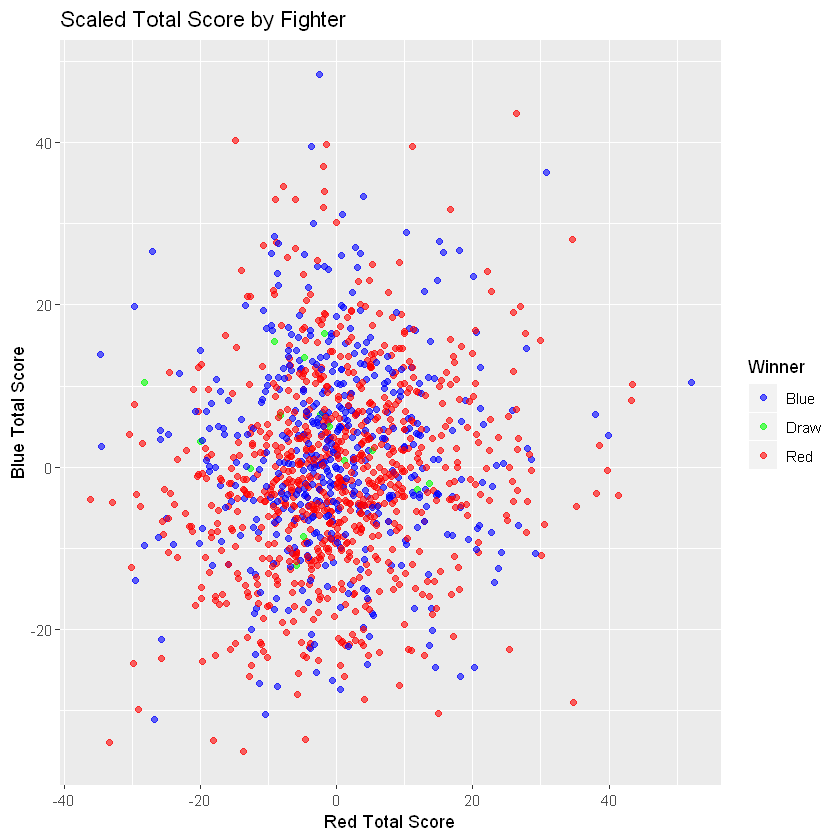

In [40]:
# plot the data for the total score of the blue and red fighter when they landed a punch
B_data %>%
 ggplot(aes(x=R_avg, y=B_avg, color=Winner)) +
   geom_point(alpha=0.6)+
    labs(title="Scaled Total Score by Fighter", x = "Red Total Score", y = "Blue Total Score") +
     scale_color_manual(values = c("blue", "green", "red"))

**Observations**

- I find this chart very interesting as the total score (not including damage (ex. any column with opp) meaning having a higher overall stat did not predict the winner. The score was calculated using a scale to adjust all values in a column to the mean. We can try other measures, but this was meant to be the "easy solution". 
- There seems to be no relationship between the total score and the winner. For example, the red dot at (0, 50) is predicting the red person to win although they are behind by 50 points.  
- I think that this does end up weighting certain attributes in a match to getting a higher score. This also makes me excited for the project!